In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Checking missing values
Missing_values = diabetes_df.isnull().sum()
Missing_values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Retrieving the numeric values from the df
numeric_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
# Checking outliers
Q1 = diabetes_df[numeric_col].quantile(0.25)
Q3 = diabetes_df[numeric_col].quantile(0.75)
IQR = Q3 - Q1
#Checking values not in IQR
outliers = ((diabetes_df[numeric_col] < (Q1 - 1.5 * IQR)) | (diabetes_df[numeric_col] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Pregnancies       4
Glucose           5
BloodPressure    45
SkinThickness     1
Insulin          34
BMI              19
Age               9
dtype: int64


In [ ]:
# Copy the dataframe to delete the outliers (keep a copy for your record of the original data)
print(diabetes_df.head(4))
diabetes_df_copy = diabetes_df.copy()
for col in numeric_col:
  lower_bound = Q1[col] - 1.5 * IQR[col]
  upper_bound = Q3[col] + 1.5 * IQR[col]
  # Clip the values in the original DataFrame's column and assign back to the copy
  diabetes_df_copy[col] = diabetes_df_copy[col].clip(lower=lower_bound, upper=upper_bound)

diabetes_df_copy.head(4)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0


In [ ]:
numeric_col= ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI', 'DiabetesPedigreeFunction',	'Age',	'Outcome']

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diabetes_df_copy[numeric_col] = scaler.fit_transform(diabetes_df_copy[numeric_col])
diabetes_df_copy.head(4)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.234415,0.637363,1.0
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.116567,0.219780,0.0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.253629,0.241758,1.0
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.038002,0.000000,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


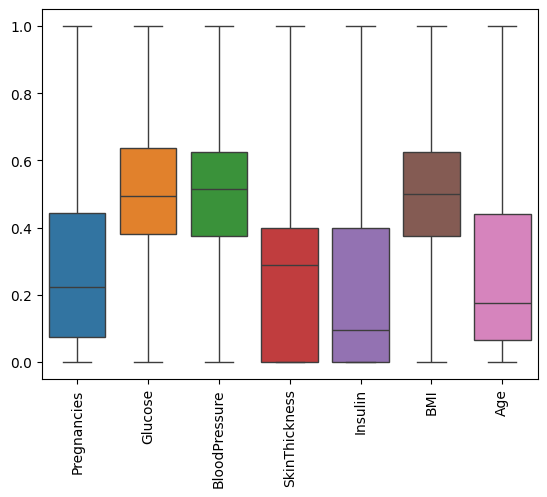

In [ ]:
numeric_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
plt.Figure(figsize = (15,10)) #Stablishing the figure size
sns.boxplot (data = diabetes_df_copy[numeric_col]) # Data input: numeric columns previously defined
plt.xticks (rotation = 90)
plt.show()

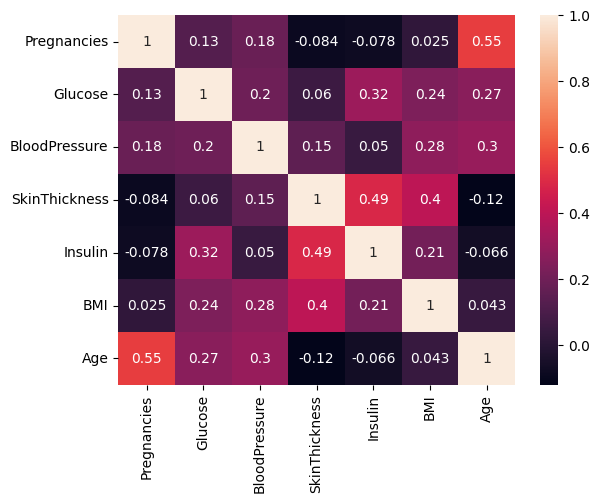

In [ ]:
# Corr matrix
plt.Figure(figsize = (15,8)) #Stablishing the figure size
sns.heatmap (diabetes_df_copy[numeric_col].corr(), annot = True) # Data input: numeric columns previously defined
plt.show()

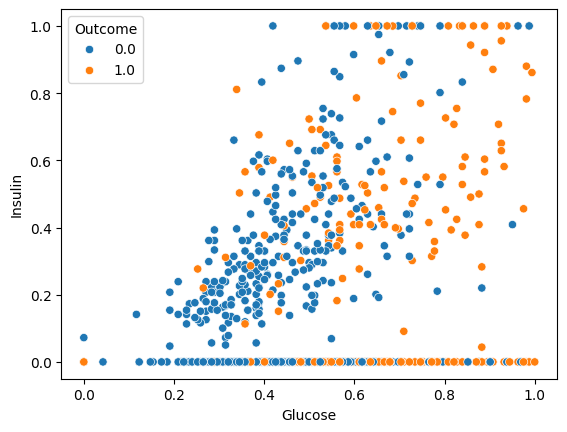

In [ ]:
# Glucose vs. Insuline with Outcome
sns.scatterplot(data = diabetes_df_copy, x = 'Glucose', y = 'Insulin', hue = 'Outcome')
plt.show()

In [ ]:
!pip install ydata-profiling # Install ydata-profiling using the correct package name 'ydata-profiling'

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8eac8e6606b0c5bac477fba837e0bee9c990659518cadf1ad293006e2bb2900e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport # Import ProfileReport after installation
profile = ProfileReport(diabetes_df_copy, title = 'Diabetes Report') # Generate profile report
profile.to_file(output_file = 'diabetes_report.html') # Save to HTML file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

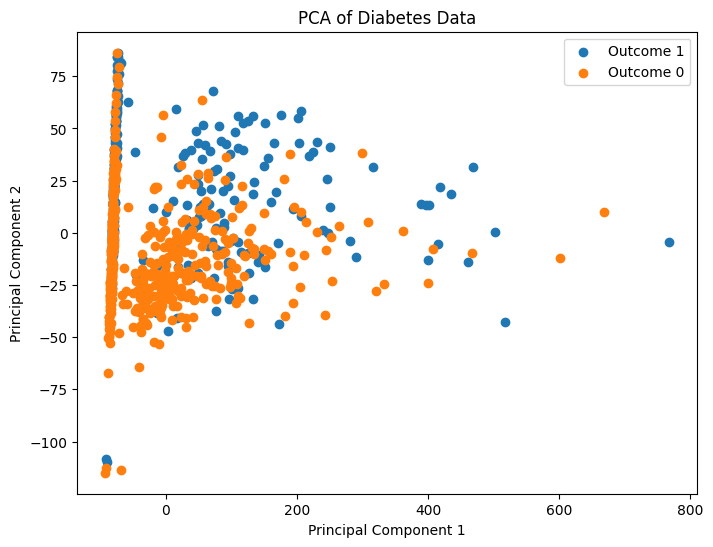

In [ ]:
# PCA plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # Set the number of components to 2
principal_components = pca.fit_transform(diabetes_df[numeric_col])


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = diabetes_df['Outcome']

# Plot the PCA results
plt.figure(figsize=(8, 6))
for outcome in pca_df['Outcome'].unique():
    subset = pca_df[pca_df['Outcome'] == outcome]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Outcome {outcome}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Diabetes Data')
plt.legend()
plt.show()


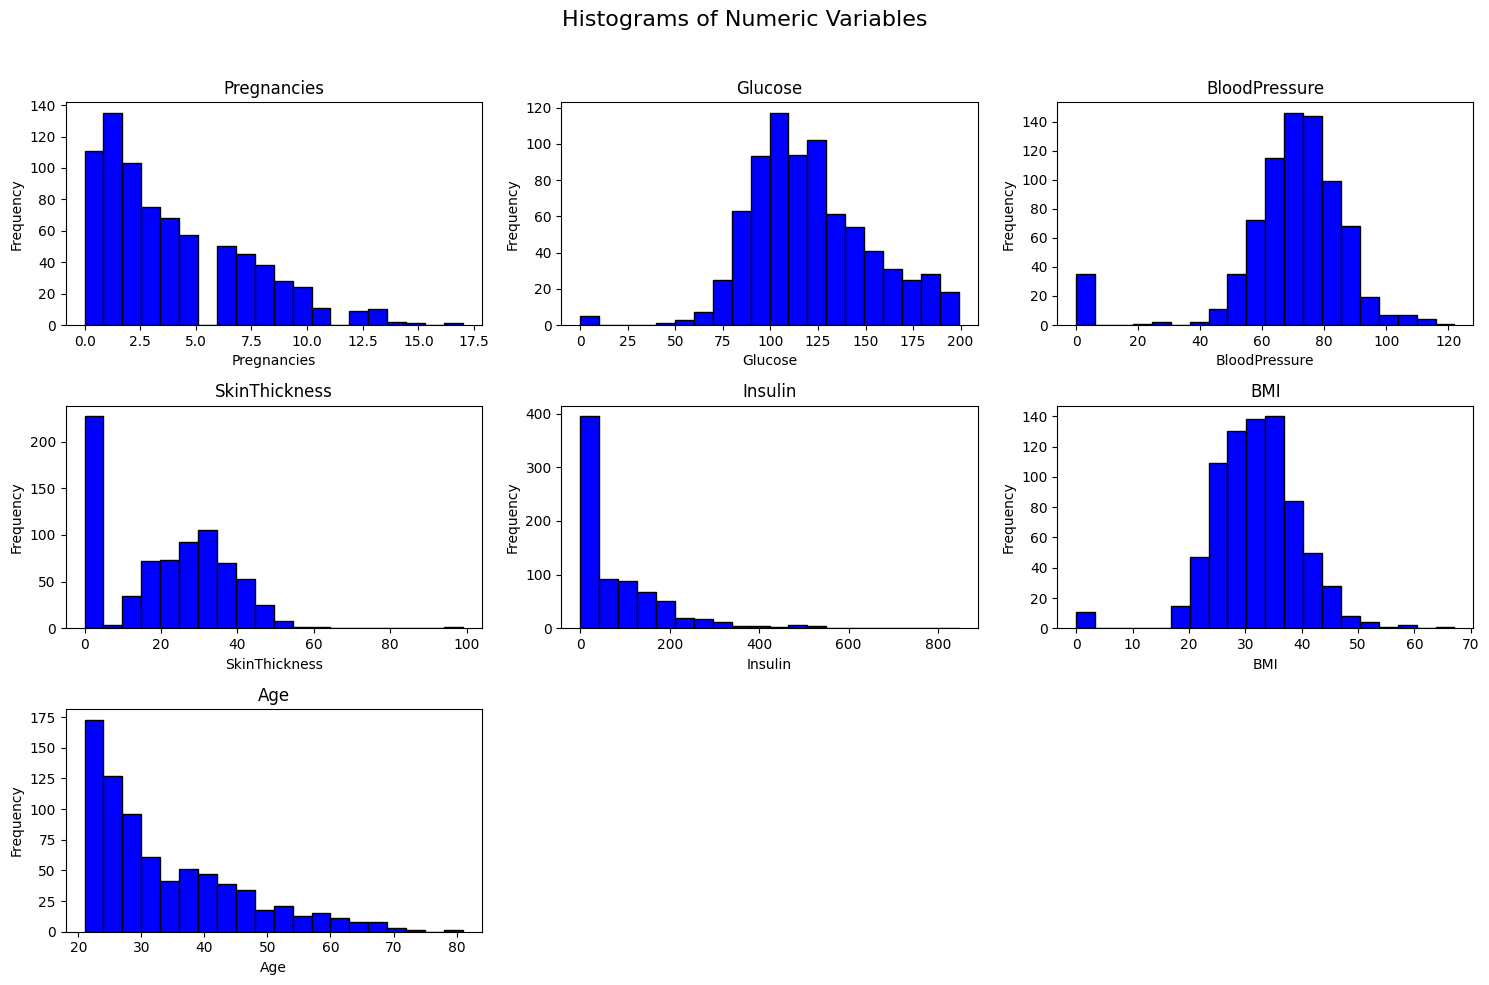

In [ ]:
# Histograms of frecuency for a variable
import matplotlib.pyplot as plt

# Define the number of subplots based on the number of numeric columns
num_vars = len(numeric_col)
rows = (num_vars // 3) + 1 if num_vars % 3 != 0 else num_vars // 3

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 10))
fig.suptitle('Histograms of Numeric Variables', fontsize=16)


axes = axes.flatten()

# Plot histograms for each numeric variable
for i, col in enumerate(numeric_col):
    axes[i].hist(diabetes_df[col], bins=20, color='blue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


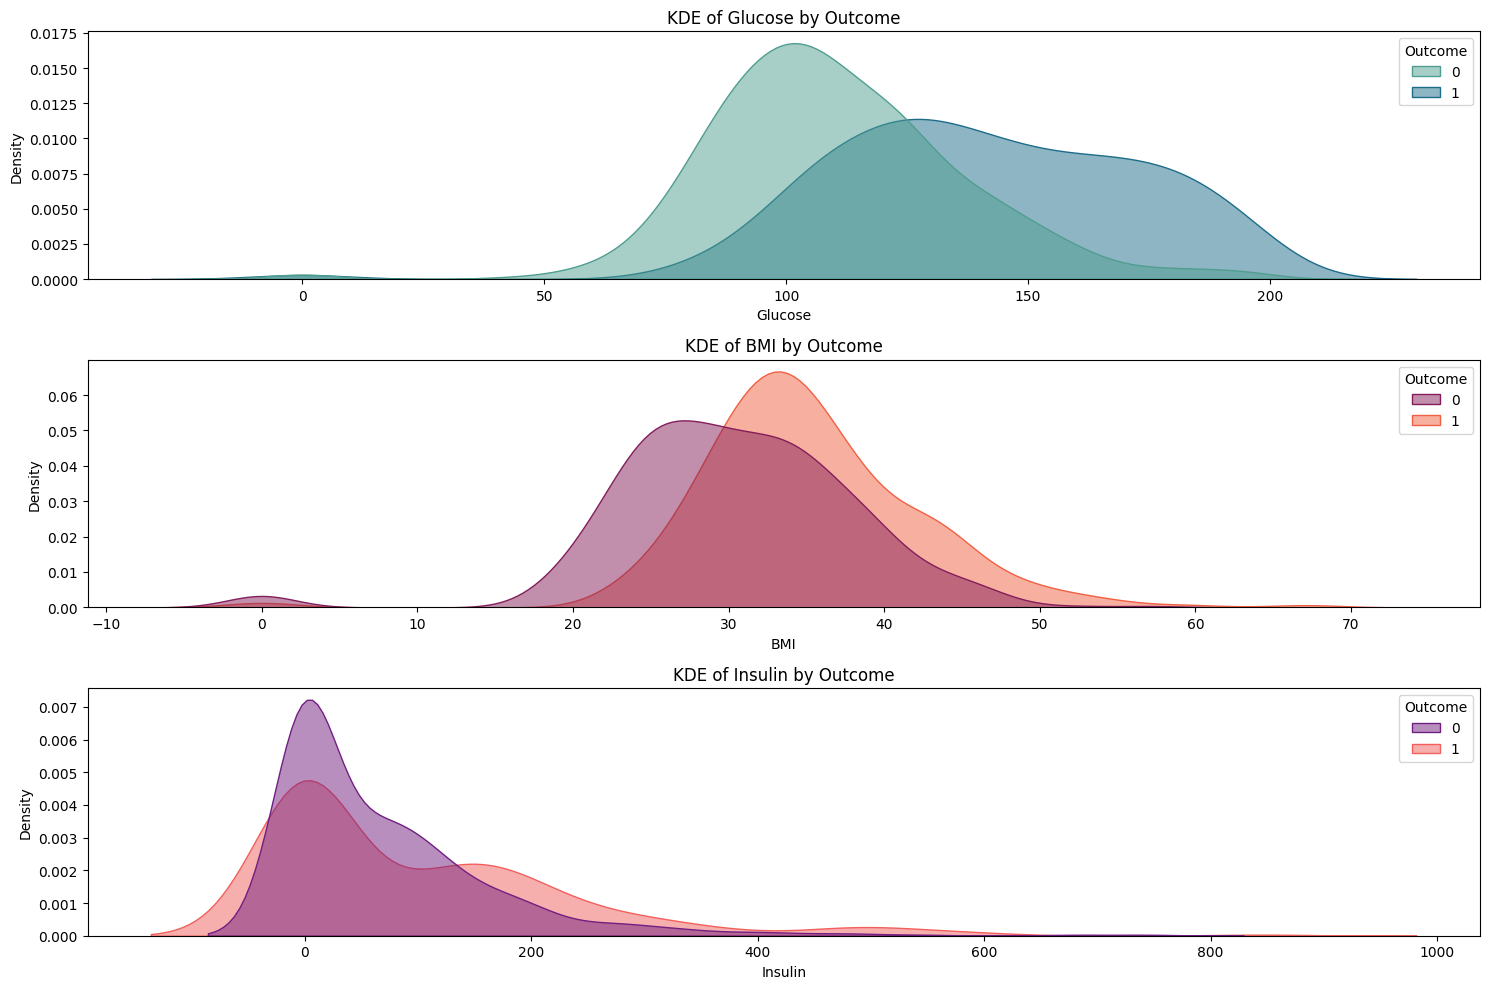

In [ ]:
# KDE Kernel distribution


# KDE plots for Glucose, BMI, and Insulin differentiated by Outcome
plt.figure(figsize=(15, 10))

# KDE for Glucose
plt.subplot(3, 1, 1)
sns.kdeplot(data=diabetes_df, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette="crest", alpha=0.5)
plt.title('KDE of Glucose by Outcome')

# KDE for BMI
plt.subplot(3, 1, 2)
sns.kdeplot(data=diabetes_df, x='BMI', hue='Outcome', fill=True, common_norm=False, palette="rocket", alpha=0.5)
plt.title('KDE of BMI by Outcome')

# KDE for Insulin
plt.subplot(3, 1, 3)
sns.kdeplot(data=diabetes_df, x='Insulin', hue='Outcome', fill=True, common_norm=False, palette="magma", alpha=0.5)
plt.title('KDE of Insulin by Outcome')

plt.tight_layout()
plt.show()
